In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit
from numpy import exp
from numpy import sin
from numpy import tanh


In [5]:
def e(z):
    #return 0.4
    #return sin(z*10)/2 + 0.5
    return 1-fraction_data[np.where(depth == z)[0]]

In [6]:
def H(z):
    return -tanh(((c2+c1)*(z-(c2+c1)/2))/(c2-c1))

In [7]:
def l (z,s,a1,b1,a2,b2):
    return e(z)/(1+exp(-a1*s+b1)) + (1-e(z))/(1+exp(-a2*s+b2))

In [8]:
def l_diff(z,s,a1,b1,a2,b2):
    return e(z) * (a1*exp(-a1*s+b1))/(1+exp(-a1*s+b1))**2 + (1-e(z)) * (a2*exp(-a2*s+b2))/(1+exp(-a2*s+b2))**2 

In [9]:
def integral(s,z,a1,a2,b1,b2):
    return H(z-s)*l_diff(z,s,a1,b1,a2,b2)

In [10]:
def functional_integration(z,a1,a2,b1,b2):        
    return quad(integral, 0, z, args=(z,a1,a2,b1,b2))[0]

In [11]:
def get_magnetisation(z,a1,a2,b1,b2):
    vec_expint = np.vectorize(functional_integration)
    M = vec_expint(z,a1,a2,b1,b2)
    
    return tanh(M*10**3)
    #return M

In [12]:
def objective(params, z, M_observed):
    a1, a2, b1, b2 = params
    M = get_magnetisation(z, a1, a2, b1, b2)
    return np.sum((M-M_observed)**2)

In [31]:
def compute_gradient(params, z, M_observed, epsilon=1e-6):
    grad = np.zeros_like(params)
    for i in range(len(params)):
        params_epsilon = np.array(params)
        params_epsilon[i] += epsilon
        loss1 = objective(params_epsilon, z, M_observed)
        
        params_epsilon[i] -= 2 * epsilon
        loss2 = objective(params_epsilon, z, M_observed)
        
        grad[i] = (loss1 - loss2) / (2 * epsilon)
    
    return grad

In [37]:
def gradient_descent(z, M_observed, initial_guess, learning_rate=0.01, tolerance=1e-6, max_iterations=1000):
    params = np.array(initial_guess)
    for iteration in range(max_iterations):
        grad = compute_gradient(params, z, M_observed)
        new_params = params - learning_rate * grad
        
        # Проверка на сходимость
        if np.linalg.norm(new_params - params) < tolerance:
            print(f"Градиентный спуск сошелся за {iteration} итераций.")
            return new_params
        
        params = new_params
    
    print("Градиентный спуск не сошелся.")
    return params

In [15]:
depth , fraction_data = np.loadtxt('ez.txt', unpack = True)

In [16]:
#a1 = 8.9
#a2 = 1.8
#b1 = 5.6
#b2 = 7.2

c1 = 73
c2 = 74.5


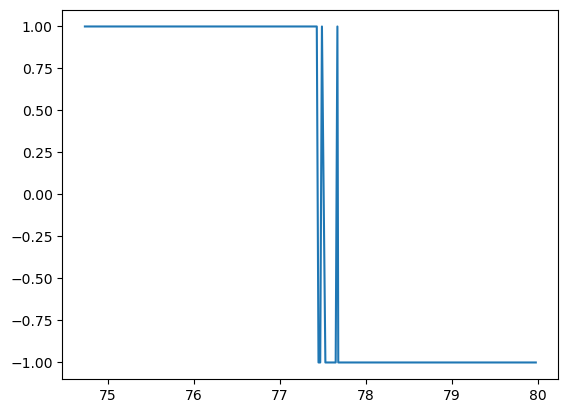

In [17]:
M = get_magnetisation(depth,1.9,3.1,8,5)
#M = get_magnetisation(depth,8.9,1.8,5.6,7.2)
plt.plot(depth,M)

In [25]:
initial_guess = [2., 3., 7., 5.]

In [38]:
optimal_params = gradient_descent(depth, M, initial_guess)

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_30432\2291846143.py:2: RuntimeWarning: overflow encountered in scalar power
  return e(z) * (a1*exp(-a1*s+b1))/(1+exp(-a1*s+b1))**2 + (1-e(z)) * (a2*exp(-a2*s+b2))/(1+exp(-a2*s+b2))**2


Градиентный спуск сошелся за 1 итераций.


In [39]:
optimal_params

array([-5.49525739,  2.93675323,  9.29469838,  5.01159427])

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_30432\2291846143.py:2: RuntimeWarning: overflow encountered in scalar power
  return e(z) * (a1*exp(-a1*s+b1))/(1+exp(-a1*s+b1))**2 + (1-e(z)) * (a2*exp(-a2*s+b2))/(1+exp(-a2*s+b2))**2


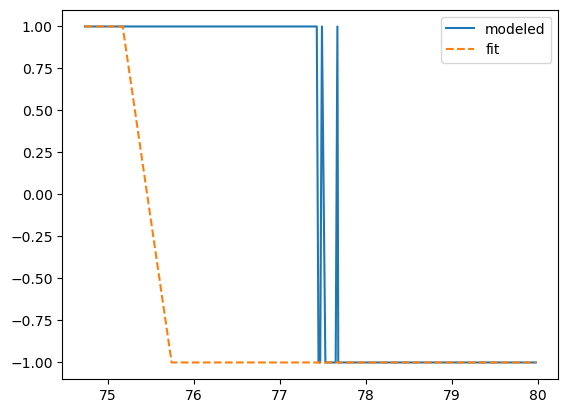

In [35]:
plt.plot(depth,M,label = 'modeled')
plt.plot(depth,get_magnetisation(depth,optimal_params[0],optimal_params[1],optimal_params[2],optimal_params[3]),label = 'fit',linestyle = 'dashed')
plt.legend()
plt.savefig('test')
plt.show()

In [36]:
l_initial = l(4,z,8.9,5.6,1.8,7.2)
l_fit = l(4,z,optimal_params[0],optimal_params[2],optimal_params[1],optimal_params[3])

plt.plot(z,l_initial,label = 'modeled')
plt.plot(z,l_fit,label = 'fit',linestyle = 'dashed')
plt.legend()
plt.savefig('test_lock-in')
plt.show()

NameError: name 'z' is not defined